# Perculation Simulation

## The drawing table

First of all we have to create a grid of size L. With a $p$ probability that each of the squares inside the raster is occupied.
We will do this by creating a matrix where all the elements are initially zero and have a chance $p$ to be 1.

In [1]:
import numpy as np
import random
import time

In [2]:
import pixiedust

Pixiedust database opened successfully


In [3]:
#this function will give True or False to later determine what elements will be coloured in the grid.
def decision(probability):
    return random.random() < probability

In [4]:
def one_or_zero(el, probability):
    if decision(probability):
        return 1
    else:
        return 0

In [5]:
def create_world(size,probability):
    vector= np.zeros(size**2)  #create vector to make the iteration easier
    vector[:] = [one_or_zero(el,probability) for el in vector]   #make certain elements one and zero depending on the prob
    return vector.reshape(size,size)    #reshape the vector to a matrix

In [6]:
M=create_world(5,0.7)
M

array([[1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0.]])

In [7]:
from matplotlib import pyplot as plt
from matplotlib import colors

def draw_array(M):
    cmap = colors.ListedColormap(['White','Red'])
    plt.figure(figsize=(5,5))
    plt.pcolor(M[::-1],cmap=cmap,edgecolors='k', linewidths=0.1)
    plt.show()

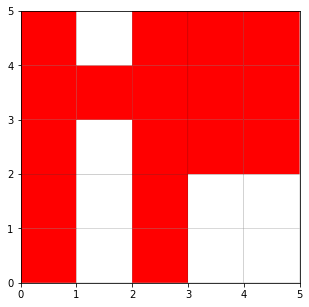

In [8]:
draw_array(M)

## How to count?

We will now implement an algoritm to count the amount of clusters in the grid. The method I have chosen is the Hoshen and Kopelman algortim.

The function below returns the number of clusters, the list in where the clusters are counted with their respective number of sites (negative means that this one is 'slorped' by another cluster), the matrix in which the different numbers can be shown,  the number of unoccupied sites and the number of the sites in the largest cluster.

In [9]:
def occupied(el):
    return el==1

In [10]:
def get_true_label_value(value,lijst):
    if lijst[int(value)]>0:
        return lijst[int(value)]
    else:
        return get_true_label_value(-lijst[int(value)], lijst)

In [15]:
x=np.array([3.,0.,-4.,-2.,-2.])
get_true_label_value(4,x)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [28]:
def get_true_label(value,lijst):
    if lijst[int(value)]>0:
        return value
    else:
        return get_true_label(-lijst[int(value)], lijst)

In [23]:
def count_true_cluster(cell,lijst):
    label=get_true_label(cell,lijst)
    lijst[int(label)]+=1
#     if label<0:
#         lijst[-int(label)]+=1
#     else:
#         lijst[int(cell)]+=1

In [29]:
def Hoshen_and_Kopelman(matrix):
    U=np.copy(matrix)
    l=2
    lijst =np.zeros(round((len(matrix)**2)/2))
    if occupied(U[0,0]):
        U[0,0]=l
        lijst[l]+=1
        l+=1
    else:
        lijst[0]+=1
    for j in range(len(U[0,:])-1): #top row
        j+=1
        if occupied(U[0,j]):
            if U[0,j-1]!=0:         #look left
                U[0,j]=U[0,j-1]
                lijst[int(U[0,j-1])]+=1.
            else:
                U[0,j]=l
                lijst[l]+=1
                l+=1
        else:
            lijst[0]+=1
    for i in range(len(U[0,:])-1):
        i+=1
        for j in range(len(U[:,0])):
            if j==0:
                if occupied(U[i,0]):
                    if U[i-1,0]!=0:           #look up
                        U[i,0]=U[i-1,0]
                        count_true_cluster(U[i,0],lijst)
                    else:
                        U[i,0]=l
                        lijst[l]+=1
                        l+=1
                else:
                    lijst[0]+=1
            

            elif occupied(U[i,j]):                
                if U[(i-1),j]!=0:            #look up
                    U[i,j]=U[i-1,j]
                    count_true_cluster(U[i,j],lijst)
                        
                    if U[i,j-1]!=0:             #look left AND right to merge
                        if get_true_label(U[i,j],lijst)!=get_true_label(U[i,j-1],lijst):
                            
                            if lijst[int(U[i,j-1])]>0:    #if the label on the left is positive merge the count from that one to the count of top one
                                lijst[int(get_true_label(U[i,j],lijst))]+=(get_true_label_value(U[i,j-1], lijst))
                                lijst[int(U[i,j-1])]=-U[i,j]
             
                elif U[i,j-1]!=0:         #look left
                    U[i,j]=U[i,j-1]
                    count_true_cluster(U[i,j],lijst)
                    
                else:
                    U[i,j]=l
                    lijst[l]+=1
                    l+=1
            else:
                lijst[0]+=1
          
        
    number_of_clusters= sum([i>0 for i in lijst[1:]])
    number_of_unoccupied_sites=lijst[0]
    largest_cluster=max(lijst[1:])
    return [number_of_clusters, lijst, U, number_of_unoccupied_sites, largest_cluster]

Hoshen_and_Kopelman(M)

[1,
 array([ 8.,  0., -3., 17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([[2., 0., 3., 3., 3.],
        [2., 2., 3., 3., 3.],
        [2., 0., 3., 3., 3.],
        [2., 0., 3., 0., 0.],
        [2., 0., 3., 0., 0.]]),
 8.0,
 17.0]

## Example

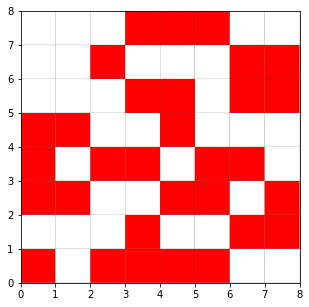

In [61]:
M=create_world(8,0.6)
small_world=Hoshen_and_Kopelman(M)
draw_array(M)

Number of clusters:

In [62]:
small_world[0]

10

In [63]:
small_world[4]

5.0

In [40]:
small_world[1]

array([17.,  0., 14.,  3., 13.,  2., -4., -2., -6.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

## Time

In [60]:
M=create_world(1000,0.7)
# draw_array(M)
toc= time.time()
HK=Hoshen_and_Kopelman(M)[0]
tic = time.time()
t=tic-toc
t

15.163591623306274

In [81]:
def smiley():
    S=np.zeros(6*8).reshape(6,8)
    S[1,2]=1
    S[1,5]=1
    S[-3,1]=1
    S[-2,2:6]=1
    S[-3,6]=1
    draw_array(S)

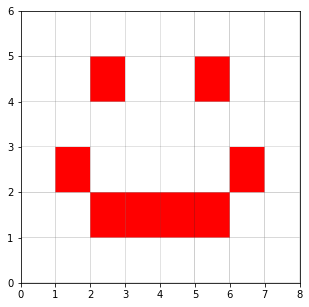

In [82]:
smiley()